# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2026_codes/labs_lecture03/lab04_train_vanilla_nn'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [3]:
from utils import check_fashion_mnist_dataset_exists
data_path = check_fashion_mnist_dataset_exists()

train_data = torch.load(data_path + 'fashion-mnist/train_data.pt')
train_label = torch.load(data_path + 'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [4]:
test_data = torch.load(data_path + 'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        
        # complete here
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        
        x = self.linear(x) # complete here
        p = torch.softmax(x, dim=1) # complete here
        
        return p

### Build the net

In [6]:
net = one_layer_net(784, 10)
print(net)

one_layer_net(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


### Take the 4th image of the test set:

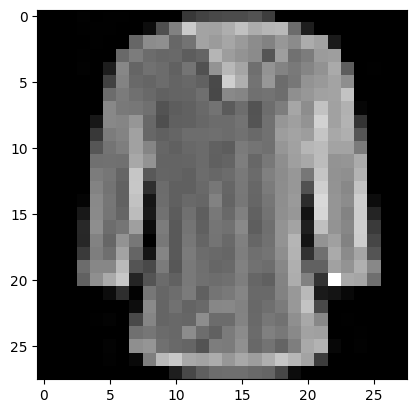

In [7]:
im = test_data[4] # complete here
utils.show(im)

### And feed it to the UNTRAINED network:

In [8]:
p = net(im.view((-1, 28*28))) # complete here
print(p)

tensor([[0.0755, 0.0589, 0.0852, 0.1110, 0.0947, 0.0876, 0.1452, 0.1139, 0.1208,
         0.1072]], grad_fn=<SoftmaxBackward0>)


### Display visually the confidence scores

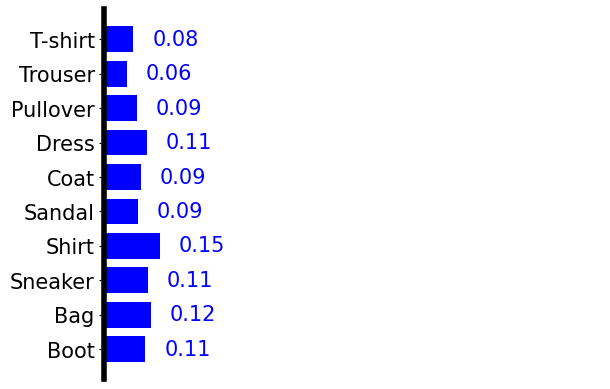

In [9]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [10]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network
    idx = torch.LongTensor(1).random_(0, 60000)

    # complete here
    train_datapoint = train_data[idx].view((-1, 784))
    # complete here
    label = train_label[idx]
    # complete here



    # feed the input to the net  
    train_datapoint.requires_grad_() # for backprobagation -- we will discuss it later
    # complete here
    prob = net(train_datapoint)

 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

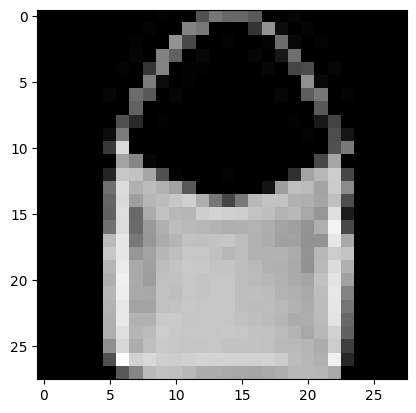

In [11]:
im = test_data[34] # complete here
utils.show(im)

### Feed it to the TRAINED net:

In [12]:
p = net(im.view((-1, 784))) # complete here
print(p)

tensor([[7.1812e-04, 1.6954e-05, 4.8232e-02, 7.5652e-03, 3.9672e-03, 5.3483e-02,
         2.0697e-02, 5.0815e-04, 8.6462e-01, 1.9094e-04]],
       grad_fn=<SoftmaxBackward0>)


### Display visually the confidence scores

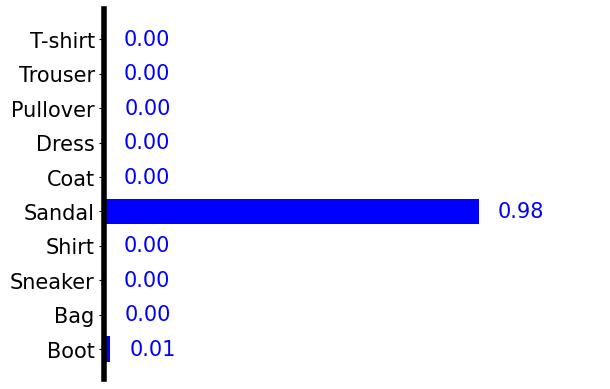

In [13]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

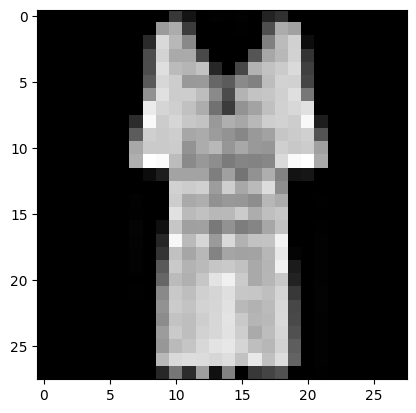

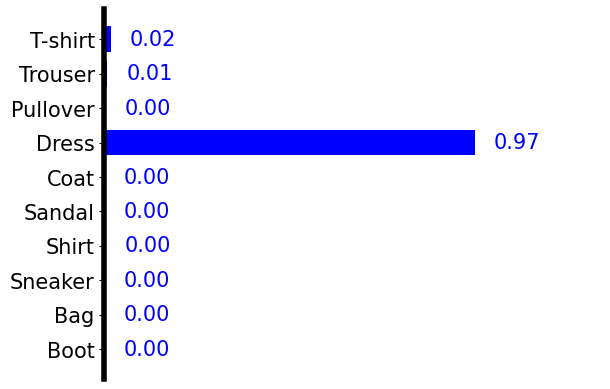

In [14]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob = net(im.view(1, 784)) 
utils.show_prob_fashion_mnist(prob)